# Data Wrangle Project

## Project Details :-
* Data wrangling, which consists of:
  * Gathering data
  * Assessing data
  * Cleaning data
* Storing, analyzing, and visualizing our wrangled data
* Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

In [2]:
# imprt libraries.  
import pandas as pd
import numpy as np
import requests
import re
import json
import matplotlib
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import os
import datetime
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
# read csv as a Pandas DataFrame
df_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2200,668655139528511488,NaN,NaN,2015-11-23 04:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668655139...,11,10,Winifred,None,None,None,None
884,760190180481531904,NaN,NaN,2016-08-01 19:07:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She's addicted to balloons. It's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760190180...,10,10,Sadie,None,None,None,None
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883117836...,13,10,None,None,None,None,None
780,775733305207554048,NaN,NaN,2016-09-13 16:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo,None,None,None
521,809920764300447744,NaN,NaN,2016-12-17 00:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Please only send in dogs. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,None,None,None,None
1457,695095422348574720,NaN,NaN,2016-02-04 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just a beautiful pupper good shit evol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695095422...,12,10,just,None,None,pupper,None
1788,677557565589463040,NaN,NaN,2015-12-17 18:34:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reckless pupper here. Not even looking at road...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677557565...,10,10,None,None,None,pupper,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
754,778764940568104960,NaN,NaN,2016-09-22 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god it's Narcos but Barkos. 13/10 someon...,NaN,NaN,NaN,https://m.youtube.com/watch?v=idKxCMsS3FQ&feat...,13,10,None,None,None,None,None


In [6]:
consumer_key = 'xui0U9weBxbKl8dBCJAEhsE2O'
consumer_secret = 'eHNx0aZ7fHeGW6BWeK9syatU9XfCCAgzSPtQhVhwExBVzmsXvN'
access_token = '256549798-jZJEVSb1HMhZB0EO6xl85D4I1id2nqINNtMdmTui'
access_secret = 'EgMqMkde82xSzlpHyF394UDN4PvOnywHL7UDXcOqEWAi4'

# using tweepy library
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# list of tweet ids from enhanced data set
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_notify=True, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
18

Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
20

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

In [7]:
# Using requests library to download tsv file hosted on udacity server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = url.split("/")[-1]
r = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name , 'wb') as f:
        f.write(r.content)

In [8]:
# read image_predictions.tsv
image_predictions_df = pd.read_csv(file_name , sep = "\t")

In [9]:
# creating empty list to append 'tweet_json.txt' file in it
df_list = []
# reading 'tweet_json.txt' file line by line and name columns 
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list)

In [10]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2153,669661792646373376,NaN,NaN,2015-11-25 23:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669661792...,5,10,a,None,None,None,None
535,807059379405148160,NaN,NaN,2016-12-09 03:08:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Cali. She arrived preas...,7.829691e+17,4.196984e+09,2016-10-03 15:42:44 +0000,https://twitter.com/dog_rates/status/782969140...,12,10,Cali,None,None,None,None
1430,697575480820686848,NaN,NaN,2016-02-11 00:18:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ole. He's not sure how to gravity. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697575480...,8,10,Ole,None,None,None,None
2184,668988183816871936,NaN,NaN,2015-11-24 03:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Lots of fur on him. Tw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668988183...,7,10,None,None,None,None,None
1019,746790600704425984,NaN,NaN,2016-06-25 19:42:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you just can't resist... 10/10 topnotch t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746790600...,10,10,None,None,None,None,None
1556,688828561667567616,NaN,NaN,2016-01-17 21:01:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688828561...,9,10,Brad,None,None,None,None
1601,686003207160610816,NaN,NaN,2016-01-10 01:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hammond. He's a peculiar pup. Loves lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686003207...,3,10,Hammond,None,None,None,None
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lucy and Sophie. They think they'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,None,None,None,None
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749395845...,10,10,George,None,None,None,None


In [11]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
999,708479650088034305,https://pbs.twimg.com/media/CdUGcLMWAAI42q0.jpg,1,Shih-Tzu,0.218479,True,Lhasa,0.201966,True,Norfolk_terrier,0.165225,True
635,681231109724700672,https://pbs.twimg.com/media/CXQ4EwQWwAEVaUf.jpg,1,Irish_setter,0.406047,True,cocker_spaniel,0.345646,True,Airedale,0.147912,True
765,689143371370250240,https://pbs.twimg.com/media/CZBUO2UWsAAKehS.jpg,1,English_springer,0.303781,True,papillon,0.165132,True,Welsh_springer_spaniel,0.149051,True
217,670069087419133954,https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg,1,boathouse,0.313829,False,birdhouse,0.138331,False,ashcan,0.045673,False
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True
292,671186162933985280,https://pbs.twimg.com/media/CVCIQX7UkAEzqh_.jpg,1,Chihuahua,0.319106,True,whippet,0.169134,True,toy_terrier,0.125815,True


In [12]:
api_df.sample(10)

,tweet_id,retweet_count,favorite_count,user_count
2197,668221241640230912,182,479,8945668
1413,696488710901260288,986,2433,8945638
1803,675898130735476737,536,1527,8945657
923,752519690950500352,3345,7186,8945607
2063,670727704916926465,328,778,8945662
37,884925521741709313,15876,70173,8945673
1247,708810915978854401,6633,15884,8945635
1576,685532292383666176,1110,2931,8945642
880,758405701903519748,1854,5084,8945607
325,832273440279240704,2265,11086,8945678


## Assess :-

# Quality :

## image_predictions_df :-

- (1) columns heading need to be renamed
- (2) delete tweets without images
- (3) "timestamp" column not in wright Dtype formate
- (4) Extract source from "source" column
- (5) delete inreply tweets 
- (6) delete retweeted rows
- (8) set "rating_denominator" column to 10
- (10) low prediction rows after merge
- (12) creat only one column called "life_stage"

# Tidenesss :-

- (2)  Merge all dataframes in oe dataframe 
- (7)  Delete Null columns
- (9)  "confidence , predection and breed" make only one column for each
- (11) Delete "prediction_level" column 
- (12) merge "doggo", "floofer", "pupper" and "puppo" in one column named "life_stage"

In [13]:
# visual Assess
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2321 non-null   int64
 1   retweet_count   2321 non-null   int64
 2   favorite_count  2321 non-null   int64
 3   user_count      2321 non-null   int64
dtypes: int64(4)
memory usage: 72.7 KB


In [14]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.321000e+03,2321.000000,2321.000000,2.321000e+03
mean,7.420242e+17,2609.943128,7350.747953,8.945655e+06
std,6.835547e+16,4419.085509,11426.864465,5.613541e+01
min,6.660209e+17,1.000000,0.000000,8.945602e+06
25%,6.780211e+17,524.000000,1265.000000,8.945636e+06
50%,7.186315e+17,1215.000000,3180.000000,8.945657e+06
75%,7.986868e+17,3028.000000,9000.000000,8.945674e+06
max,8.924206e+17,74879.000000,151274.000000,8.946258e+06


# Clean:-

In [21]:
# copy DataFrames 
image_predictions_df_clean = image_predictions_df.copy()

In [22]:
api_df_clean = api_df.copy()

In [23]:
df_archive_clean = df_archive.copy()

# image_predictions_df_clean :-

## Define:- 
rename columns names to the full name of each column

## Code :- 

In [24]:
# rename columns
new_columns = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_df_clean.columns = new_columns

## Test

In [25]:
image_predictions_df_clean

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Define :-
merge all data frame in one dataframe "df_archive_clean"

## Code :- 

In [26]:
# merge df_archive_clean and api_df_clean
df_archive_clean = pd.merge(left = df_archive_clean , right = api_df_clean, left_on = "tweet_id", right_on = "tweet_id", how = "inner")

In [27]:
# merge df_archive_clean and image_predictions_df_clean
df_archive_clean = pd.merge(left = df_archive_clean , right = image_predictions_df_clean, right_on = "tweet_id", left_on = "tweet_id",how = "inner")

## Test

In [28]:
df_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
1751,671390180817915904,NaN,NaN,2015-11-30 18:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671390180...,...,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False
649,770787852854652928,NaN,NaN,2016-08-31 00:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,...,1,Bernese_mountain_dog,0.787812,True,Greater_Swiss_Mountain_dog,0.163946,True,EntleBucher,0.020293,True
941,725842289046749185,NaN,NaN,2016-04-29 00:21:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Colby. He's currently regretting all t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725842289...,...,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1204,695095422348574720,NaN,NaN,2016-02-04 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just a beautiful pupper good shit evol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695095422...,...,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True
866,740214038584557568,NaN,NaN,2016-06-07 16:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740214038...,...,1,Chesapeake_Bay_retriever,0.586414,True,Labrador_retriever,0.189782,True,vizsla,0.067607,True
188,847116187444137987,NaN,NaN,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847116187...,...,1,white_wolf,0.128935,False,American_Staffordshire_terrier,0.113434,True,dingo,0.081231,False
1774,670833812859932673,NaN,NaN,2015-11-29 05:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jett. He is unimpressed by flower. 7/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670833812...,...,1,Pekinese,0.609853,True,Persian_cat,0.265442,False,Japanese_spaniel,0.027460,True
1576,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,...,1,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True
309,824796380199809024,NaN,NaN,2017-01-27 01:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bailey. She loves going...,7.950767e+17,4.196984e+09,2016-11-06 01:33:58 +0000,https://twitter.com/dog_rates/status/795076730...,...,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
135,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526...,...,1,French_bulldog,0.254587,True,Staffordshire_bullterrier,0.192558,True,hog,0.100270,False


## Define :-
change "timestamp" Dtype to Datetime

## Code :- 

In [29]:
# change "timestamp" Dtype
df_archive_clean["timestamp"] = pd.to_datetime(df_archive_clean["timestamp"])

## Test

In [30]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2049 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2049 non-null   datetime64[ns, UTC]
 4   source                      2049 non-null   object             
 5   text                        2049 non-null   object             
 6   retweeted_status_id         72 non-null     float64            
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2049 non-null   object             
 10  rating_numerator            2049 non-null   int64           

## Define :-
Extract source frome text

## Code :- 

In [31]:
# Extract the source of tweet from source column
df_archive_clean["source"]= df_archive_clean["source"].apply(lambda x: re.findall(r'>(.*)<', x)[0])

## Test

In [32]:
df_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
1262,690374419777196032,NaN,NaN,2016-01-22 03:24:22+00:00,Twitter for iPhone,This is Phred. He's an Albanian Flepperkush. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690374419...,...,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False
1177,697990423684476929,NaN,NaN,2016-02-12 03:47:39+00:00,Twitter for iPhone,This is Doug. He's a Draconian Jabbawockee. Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697990423...,...,2,Pembroke,0.984783,True,Cardigan,0.015018,True,Shetland_sheepdog,0.000074,True
1882,668981893510119424,NaN,NaN,2015-11-24 02:38:07+00:00,Twitter for iPhone,Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,...,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False
537,788765914992902144,NaN,NaN,2016-10-19 15:37:03+00:00,Twitter for iPhone,This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,...,1,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False
320,822872901745569793,NaN,NaN,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,...,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1213,694206574471057408,NaN,NaN,2016-02-01 17:11:59+00:00,Twitter for iPhone,"""Martha come take a look at this. I'm so fed u...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694206574...,...,1,Shih-Tzu,0.352547,True,toy_poodle,0.155720,True,Maltese_dog,0.116657,True
1567,675362609739206656,NaN,NaN,2015-12-11 17:12:48+00:00,Twitter for iPhone,This is Daisy. She loves that shoe. Still no s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675362609...,...,1,Labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
1710,672239279297454080,NaN,NaN,2015-12-03 02:21:48+00:00,Twitter for iPhone,This is Ridley. He doesn't know how to couch. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672239279...,...,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
727,757729163776290825,NaN,NaN,2016-07-26 00:08:05+00:00,Twitter for iPhone,RT @dog_rates: This is Chompsky. He lives up t...,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,https://twitter.com/dog_rates/status/679062614...,...,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1629,674038233588723717,NaN,NaN,2015-12-08 01:30:12+00:00,Twitter for iPhone,This is Kaiya. She's an aspiring shoe model. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674038233...,...,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True


## Define:-
delete inreply tweets by "in_reply_to_status_id"

## Code :- 

In [33]:
# Delete in reply tweets
df_archive_clean = df_archive_clean[df_archive_clean["in_reply_to_status_id"].isnull()]

## Test:-

In [40]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2048
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1954 non-null   int64              
 1   timestamp           1954 non-null   datetime64[ns, UTC]
 2   source              1954 non-null   object             
 3   text                1954 non-null   object             
 4   expanded_urls       1954 non-null   object             
 5   rating_numerator    1954 non-null   int64              
 6   rating_denominator  1954 non-null   int64              
 7   name                1954 non-null   object             
 8   doggo               1954 non-null   object             
 9   floofer             1954 non-null   object             
 10  pupper              1954 non-null   object             
 11  puppo               1954 non-null   object             
 12  retweet_count       1954 non-null 

## Define :-¶
delete retweeted rows using "retweeted_status_id" column

## Code :- 

In [35]:
# Delete retweets. 
df_archive_clean = df_archive_clean[df_archive_clean["retweeted_status_id"].isnull()]

## Test:-

In [37]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2048
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1954 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1954 non-null   datetime64[ns, UTC]
 4   source                      1954 non-null   object             
 5   text                        1954 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1954 non-null   object             
 10  rating_numerator            1954 non-null   int64           

## Define :-
delete null columns ["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"]

## Code :- 

In [38]:
# creat a list containing Null columns
null_list =  [ "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"]
# Drop Null columns from DataFrame
df_archive_clean = df_archive_clean.drop(null_list, axis = 1)

## Test:-

In [41]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2048
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1954 non-null   int64              
 1   timestamp           1954 non-null   datetime64[ns, UTC]
 2   source              1954 non-null   object             
 3   text                1954 non-null   object             
 4   expanded_urls       1954 non-null   object             
 5   rating_numerator    1954 non-null   int64              
 6   rating_denominator  1954 non-null   int64              
 7   name                1954 non-null   object             
 8   doggo               1954 non-null   object             
 9   floofer             1954 non-null   object             
 10  pupper              1954 non-null   object             
 11  puppo               1954 non-null   object             
 12  retweet_count       1954 non-null 

In [39]:
df_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
1948,667782464991965184,2015-11-20 19:12:01+00:00,Twitter for iPhone,Super rare dog. Endangered (?). Thinks it's fu...,https://twitter.com/dog_rates/status/667782464...,9,10,None,None,None,...,1,lorikeet,0.466149,False,hummingbird,0.083011,False,African_grey,0.054247,False
1215,694001791655137281,2016-02-01 03:38:15+00:00,Twitter for iPhone,This is Chester. He's a Benefloof Cumberbark. ...,https://twitter.com/dog_rates/status/694001791...,11,10,Chester,None,None,...,1,Pembroke,0.769999,True,Cardigan,0.229228,True,Chihuahua,0.000247,True
199,844580511645339650,2017-03-22 16:04:20+00:00,Twitter for iPhone,This is Charlie. He wants to know if you have ...,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,...,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False
1674,672995267319328768,2015-12-05 04:25:50+00:00,Twitter for iPhone,This is Pumpkin. He can look in two different ...,https://twitter.com/dog_rates/status/672995267...,8,10,Pumpkin,None,None,...,1,French_bulldog,0.719559,True,boxer,0.166927,True,Boston_bull,0.101354,True
463,799757965289017345,2016-11-18 23:35:32+00:00,Twitter for iPhone,This is Sobe. She's a h*ckin happy doggo. Only...,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,None,...,1,Border_collie,0.442534,True,collie,0.288684,True,Shetland_sheepdog,0.196399,True
1186,697259378236399616,2016-02-10 03:22:44+00:00,Twitter for iPhone,Please stop sending in saber-toothed tigers. T...,https://twitter.com/dog_rates/status/697259378...,8,10,getting,None,None,...,1,Great_Dane,0.999223,True,boxer,0.000187,True,whippet,0.000151,True
1846,669683899023405056,2015-11-26 01:07:38+00:00,Twitter for iPhone,This is Kloey. Her mother was a unicorn. 10/10...,https://twitter.com/dog_rates/status/669683899...,10,10,Kloey,None,None,...,1,Pomeranian,0.998275,True,Chihuahua,0.000605,True,Pekinese,0.000516,True
1295,688211956440801280,2016-01-16 04:11:31+00:00,Twitter for iPhone,This is Derby. He's a superstar. 13/10 (vid by...,https://twitter.com/dog_rates/status/688211956...,13,10,Derby,None,None,...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False
1221,693590843962331137,2016-01-31 00:25:18+00:00,Twitter for iPhone,Meet Phil. He's big af. Currently destroying t...,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,...,1,dining_table,0.383448,False,grey_fox,0.103191,False,Siamese_cat,0.098256,False
1041,709207347839836162,2016-03-14 02:39:42+00:00,Twitter for iPhone,This is Penny. She's trying on her prom dress....,https://twitter.com/dog_rates/status/709207347...,11,10,Penny,None,None,...,1,Chihuahua,0.948323,True,Italian_greyhound,0.017730,True,quilt,0.016688,False


## Define :-
set "rating_denominator" column to 10.

## Code :- 

In [42]:
# Change "rating_denominator" value to 10 .
df_archive_clean.loc[: , "rating_denominator"] = int(10)

## Test:-

In [43]:
df_archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,user_count,img_num,confidence_1,confidence_2,confidence_3
count,1.954000e+03,1954.000000,1954.0,1954.000000,1954.000000,1.954000e+03,1954.000000,1954.000000,1.954000e+03,1.954000e+03
mean,7.359224e+17,12.231320,10.0,2385.467758,8097.333163,8.945655e+06,1.203173,0.593233,1.345968e-01,6.037705e-02
std,6.759766e+16,41.814597,0.0,4268.625416,11918.208611,5.574586e+01,0.560859,0.272338,1.006650e-01,5.096964e-02
min,6.660209e+17,0.000000,10.0,11.000000,69.000000,8.945602e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758041e+17,10.000000,10.0,530.000000,1710.000000,8.945636e+06,1.000000,0.360437,5.387868e-02,1.621080e-02
50%,7.082494e+17,11.000000,10.0,1149.000000,3616.500000,8.945657e+06,1.000000,0.587026,1.174550e-01,4.952715e-02
75%,7.881228e+17,12.000000,10.0,2721.000000,10123.250000,8.945672e+06,1.000000,0.846285,1.955197e-01,9.166433e-02
max,8.924206e+17,1776.000000,10.0,74879.000000,151274.000000,8.946258e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


## Define :-
merge all "confidence , predection and breed" to only column for each.

## Code :- 

In [44]:
# Merge columns
df_archive_clean = pd.wide_to_long(df_archive_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id','timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count', 'favorite_count', 'user_count','jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

## Test:-

In [48]:
df_archive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,None,7420,35160,8945672,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,None,5519,30431,8945672,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
6,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,None,3645,22886,8945672,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
9,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,None,7595,38450,8945672,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,paper_towel,0.170278,False
12,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,None,8173,36719,8945672,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,basset,0.555712,True
15,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,None,2743,18498,8945672,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1,Chesapeake_Bay_retriever,0.425595,True
18,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,...,None,1773,10758,8945672,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1,Appenzeller,0.341703,True
21,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,...,None,16605,59207,8945672,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,1,Pomeranian,0.566142,True
24,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,...,None,3790,25479,8945672,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,1,Irish_terrier,0.487574,True
27,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,...,None,6430,29073,8945672,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,1,Pembroke,0.511319,True


## Define :-
Delete low predection rows for each tweet after merge

## Code:-

In [47]:
#Delete rows
df_archive_clean = df_archive_clean[df_archive_clean['prediction_level'] == 1]

## Test:-

In [49]:
df_archive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,None,7420,35160,8945672,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,None,5519,30431,8945672,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
6,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,None,3645,22886,8945672,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
9,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,None,7595,38450,8945672,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,paper_towel,0.170278,False
12,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,None,8173,36719,8945672,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,basset,0.555712,True
15,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,None,2743,18498,8945672,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,1,Chesapeake_Bay_retriever,0.425595,True
18,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,...,None,1773,10758,8945672,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,1,Appenzeller,0.341703,True
21,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,...,None,16605,59207,8945672,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,1,Pomeranian,0.566142,True
24,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,...,None,3790,25479,8945672,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,1,Irish_terrier,0.487574,True
27,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,...,None,6430,29073,8945672,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,1,Pembroke,0.511319,True


## Define :-
drop 'prediction_level' column

## Code:-

In [50]:
# Drop column
df_archive_clean.drop(columns = 'prediction_level', inplace = True)

## Test:-

In [51]:
df_archive_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,7420,35160,8945672,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,5519,30431,8945672,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
6,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,3645,22886,8945672,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
9,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,7595,38450,8945672,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
12,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,8173,36719,8945672,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
15,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2743,18498,8945672,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True
18,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1773,10758,8945672,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True
21,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,16605,59207,8945672,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True
24,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,3790,25479,8945672,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True
27,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,6430,29073,8945672,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True


## Define :-
delete nan values from 'doggo', 'floofer', 'pupper' and 'puppo' columns

## Code:-

In [52]:
# Delete NAN values For each column
df_archive_clean["doggo"] = df_archive_clean["doggo"].replace("None" , "")
df_archive_clean["pupper"] = df_archive_clean["pupper"].replace("None" , "")
df_archive_clean["puppo"] = df_archive_clean["puppo"].replace("None" , "")
df_archive_clean["floofer"] = df_archive_clean["floofer"].replace("None" , "")

## Test:-

In [53]:
df_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction,confidence,breed
2145,749996283729883136,2016-07-04 16:00:22+00:00,TweetDeck,This is Bo. He emanates happiness. 12/10 I cou...,https://twitter.com/dog_rates/status/749996283...,12,10,Bo,,,,,792,2975,8945607,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True
639,838476387338051585,2017-03-05 19:48:43+00:00,Twitter for iPhone,This is Stanley. Somehow he heard you tell him...,https://twitter.com/dog_rates/status/838476387...,13,10,Stanley,,,,,4575,21856,8945678,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True
2883,709449600415961088,2016-03-14 18:42:20+00:00,Twitter for iPhone,Meet Karma. She's just a head. Lost body durin...,https://twitter.com/dog_rates/status/709449600...,10,10,Karma,,,,,543,2134,8945634,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,Maltese_dog,0.780187,True
54,888554962724278272,2017-07-22 00:23:06+00:00,Twitter for iPhone,This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,,,,,3044,17995,8945672,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True
5688,667073648344346624,2015-11-18 20:15:26+00:00,Twitter for iPhone,Here is Dave. He is actually just a skinny leg...,https://twitter.com/dog_rates/status/667073648...,10,10,Dave,,,,,109,372,8945669,https://pbs.twimg.com/media/CUHr8WbWEAEBPgf.jpg,1,Chihuahua,0.483682,True
888,824297048279236611,2017-01-25 16:45:05+00:00,Twitter for iPhone,This is Nala. She got in trouble. One h*ck of ...,https://twitter.com/dog_rates/status/824297048...,11,10,Nala,,,,,3768,14785,8945682,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False
141,881906580714921986,2017-07-03 16:04:48+00:00,Twitter for iPhone,This is Rey. He's a Benebop Cumberfloof. 12/10...,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,,,,,2995,22249,8945674,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True
3135,702321140488925184,2016-02-24 02:36:23+00:00,Twitter for iPhone,Please enjoy this picture as much as I did. 12...,https://twitter.com/dog_rates/status/702321140...,12,10,None,,,,,1006,3169,8945637,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True
774,830956169170665475,2017-02-13 01:46:03+00:00,Twitter for iPhone,Say hello to Reggie. He hates puns. 12/10 ligh...,https://twitter.com/dog_rates/status/830956169...,12,10,Reggie,,,,,1451,7817,8945678,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True
3222,699446877801091073,2016-02-16 04:15:05+00:00,Twitter for iPhone,This is Archie. He's undercover in all these p...,https://twitter.com/dog_rates/status/699446877...,12,10,Archie,,,,,2521,5759,8945637,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,Pembroke,0.969400,True


## Define :-
merge the four columns in one column named "life_stage" and then drop another column result from melt function

## Code:-

In [54]:
# Merge columns
df_archive_clean = pd.melt(df_archive_clean, id_vars = ['tweet_id','timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'favorite_count', 'user_count','jpg_url', 'img_num','prediction','confidence', 'breed'], value_vars = [ 'doggo', 'floofer', 'pupper', 'puppo'], var_name = 'stages', value_name = 'life_stage')
df_archive_clean = df_archive_clean.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')

In [55]:
# Drop the Empty columns
df_archive_clean.drop(columns = 'stages', inplace = True)

# Test:-

In [56]:
df_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction,confidence,breed,life_stage
3033,699323444782047232,2016-02-15 20:04:36+00:00,Twitter for iPhone,"""I'm bathing the children what do you want?"" ...",https://twitter.com/dog_rates/status/699323444...,10,10,None,830,3055,8945637,https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg,1,Labrador_retriever,0.309696,True,
3732,669214165781868544,2015-11-24 18:01:05+00:00,Twitter for iPhone,This is Jaspers. He is a northeastern Gillette...,https://twitter.com/dog_rates/status/669214165...,10,10,Jaspers,148,404,8945665,https://pbs.twimg.com/media/CUmGu7-UcAA0r3O.jpg,1,minivan,0.435396,False,
2972,705102439679201280,2016-03-02 18:48:16+00:00,Twitter for iPhone,This is Terrenth. He just stubbed his toe. 10/...,https://twitter.com/dog_rates/status/705102439...,10,10,Terrenth,498,2069,8945636,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,
282,826848821049180160,2017-02-01 17:44:55+00:00,Twitter for iPhone,This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13,10,Cupid,9888,35518,8945681,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,doggo
1862,667544320556335104,2015-11-20 03:25:43+00:00,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,487,798,8945669,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1,Pomeranian,0.412893,True,
2477,781524693396357120,2016-09-29 16:03:01+00:00,Twitter for iPhone,Idk why this keeps happening. We only rate dog...,https://twitter.com/dog_rates/status/781524693...,12,10,None,5462,20472,8945603,https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg,1,tennis_ball,0.994712,False,
5337,676936541936185344,2015-12-16 01:27:03+00:00,Twitter for iPhone,Here we see a rare pouched pupper. Ample stora...,https://twitter.com/dog_rates/status/676936541...,8,10,None,4690,12136,8945655,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,1,Chesapeake_Bay_retriever,0.545286,True,pupper
3049,698178924120031232,2016-02-12 16:16:41+00:00,Twitter for iPhone,This is Lily. She accidentally dropped all her...,https://twitter.com/dog_rates/status/698178924...,10,10,Lily,712,2726,8945637,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,
2277,819347104292290561,2017-01-12 00:55:47+00:00,Twitter for iPhone,Say hello to Anna and Elsa. They fall asleep i...,https://twitter.com/dog_rates/status/819347104...,12,10,Anna,1175,7110,8945682,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,
3001,702217446468493312,2016-02-23 19:44:20+00:00,Twitter for iPhone,"I know it's tempting, but please stop sending ...",https://twitter.com/dog_rates/status/702217446...,9,10,None,1292,4619,8945637,https://pbs.twimg.com/media/Cb7HCMkWEAAV9zY.jpg,1,golden_retriever,0.242419,True,


# Storing, Analyzing, and Visualizing Data :-

In [57]:
# Store cleaned DataFrame
df_archive_clean.to_csv( 'twitter_archive_master.csv',index=False)

In [58]:
# Read new csv file by pandas
df_archive_master = pd.read_csv('twitter_archive_master.csv')

In [59]:
# maximum "retweet_count" tweet
df_archive_master[df_archive_master["retweet_count"] == df_archive_master["retweet_count"].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,jpg_url,img_num,prediction,confidence,breed,life_stage
1658,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,74879,151274,8945607,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,doggo


In [63]:
# Most 3 popular names 
df_archive_master.name.value_counts().head(5).tail(3)

Charlie    10
Oliver     10
Cooper     10
Name: name, dtype: int64

In [65]:
# Most popular dog life stages
count_dogs = df_archive_master.groupby('life_stage')['tweet_id'].count()

In [66]:
count_dogs

life_stage
doggo       62
floofer      8
pupper     209
puppo       23
Name: tweet_id, dtype: int64

In [67]:
count_dogs.sum()

302

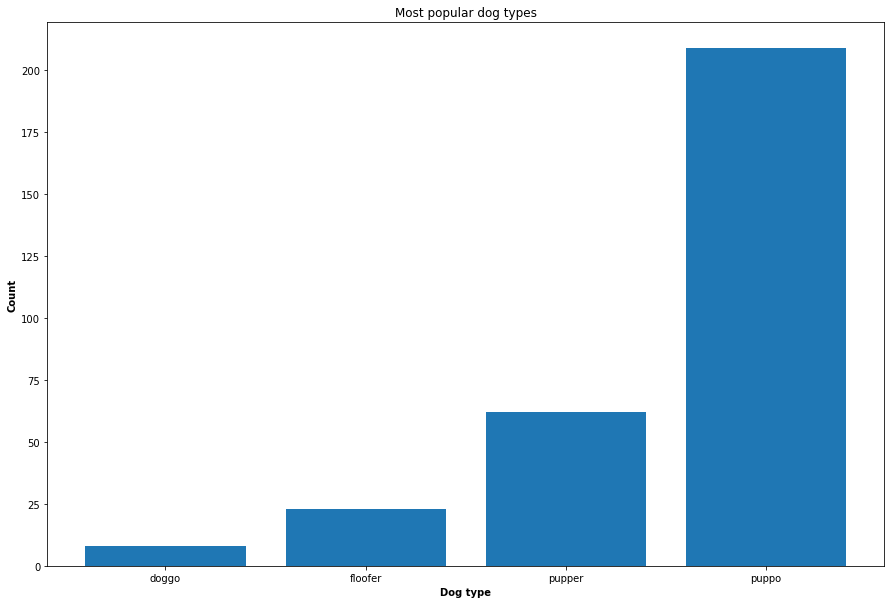

In [73]:
plt.subplots(figsize=(15, 10))
plt.bar([1, 2, 3, 4], count_dogs.sort_values(), tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Most popular dog types')
plt.xlabel('Dog type', weight='bold')
plt.ylabel('Count', weight='bold')
plt.savefig('most_pop_types.png');

### Analyses
- The most life stage people like to have is Puppo stage

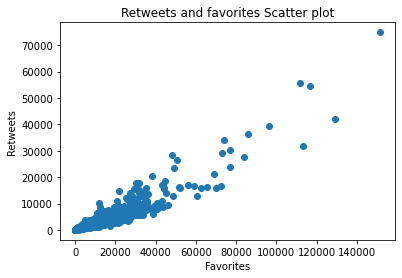

In [76]:
# make scatter plot 
plt.scatter(df_archive_master['favorite_count'], df_archive_master['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
plt.savefig('Retweets and favorites Scatter plot.png')

### Analyses
- As expected there is a big positive correlation between the retweets and favorites.